In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from pandas.plotting import scatter_matrix
from sklearn import svm
from pyspark.sql import SparkSession

%matplotlib inline

seed = 42


In [2]:
spark1 = SparkSession.builder.appName('Ops').getOrCreate()

In [3]:
# loading data 

def load_airlines_data():        
    return pd.read_csv("G:\\mini project\\tylerudite-airports-airlines-and-routes\\data\\airlines.csv")

airlines= load_airlines_data()

def load_airplanes_data():        
    return pd.read_csv("G:\\mini project\\tylerudite-airports-airlines-and-routes\\data\\airplanes.csv")

airplanes= load_airplanes_data()

def load_airports_data():        
    return pd.read_csv("G:\\mini project\\tylerudite-airports-airlines-and-routes\\data\\airlines.csv")

airports= load_airports_data()

def load_routes_data():        
    return pd.read_csv("G:\\mini project\\tylerudite-airports-airlines-and-routes\\data\\routes.csv")

routes = load_routes_data()





In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
airline_id    6162 non-null int64
name          6162 non-null object
alias         5656 non-null object
iata          1535 non-null object
icao          6075 non-null object
callsign      5343 non-null object
country       6147 non-null object
active        6162 non-null object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


In [5]:
airplanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
name         246 non-null object
iata_code    246 non-null object
icao_code    246 non-null object
dtypes: object(3)
memory usage: 5.8+ KB


In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
airline_id    6162 non-null int64
name          6162 non-null object
alias         5656 non-null object
iata          1535 non-null object
icao          6075 non-null object
callsign      5343 non-null object
country       6147 non-null object
active        6162 non-null object
dtypes: int64(1), object(7)
memory usage: 385.2+ KB


In [7]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
airline                   67663 non-null object
airline_id                67663 non-null object
source_airport            67663 non-null object
source_airport_id         67663 non-null object
destination_airport       67663 non-null object
destination_airport_id    67663 non-null object
codeshare                 14597 non-null object
stops                     67663 non-null int64
equipment                 67645 non-null object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [8]:
import networkx as nx
df = nx.from_pandas_edgelist(routes, source='source_airport', target='destination_airport', edge_attr=True)

In [9]:
df.nodes()

NodeView(('SCK', 'NYA', 'ACY', 'CPD', 'AAY', 'VIJ', 'RUH', 'SPI', 'SXI', 'INV', 'YHP', 'LBU', 'OMH', 'AAT', 'ULZ', 'PRH', 'GYD', 'FEN', 'WMI', 'GSE', 'HOT', 'VER', 'TNG', 'RMQ', 'SVC', 'AFL', 'BNA', 'EKO', 'POS', 'CXH', 'MQP', 'GRJ', 'TZX', 'NJF', 'ENY', 'IOT', 'QOW', 'SGO', 'HOB', 'ROS', 'LAW', 'WRY', 'FNT', 'YSK', 'ABQ', 'REP', 'OMD', 'SUK', 'MQL', 'LLB', 'LJU', 'VIX', 'HOF', 'TYN', 'TNW', 'DLE', 'BKI', 'ITH', 'TEB', 'SDU', 'XRY', 'LAZ', 'YSB', 'AHB', 'BDJ', 'RGI', 'SBW', 'OND', 'DNR', 'KNQ', 'GOP', 'CNF', 'KOS', 'RST', 'BIO', 'MEI', 'FKS', 'IRK', 'PMV', 'YWL', 'BRQ', 'LGL', 'BES', 'CGD', 'STR', 'ABV', 'AEX', 'FIH', 'OOL', 'DYU', 'RVD', 'YQK', 'BOS', 'PEG', 'PBM', 'JNB', 'STZ', 'BTT', 'DPL', 'BUQ', 'MSP', 'USK', 'MOT', 'EVE', 'YZP', 'OSY', 'COU', 'OXB', 'DOY', 'BAH', 'RCE', 'NLT', 'BJZ', 'VBY', 'FDE', 'TZL', 'AER', 'EDI', 'INB', 'SNW', 'YZS', 'JTY', 'SDG', 'BBK', 'LOD', 'VDA', 'TAK', 'COO', 'TAI', 'SXB', 'MEB', 'ULO', 'OTZ', 'CZL', 'BBI', 'CJB', 'BWT', 'RSA', 'KDI', 'KSM', 'KPN', 'GO

In [10]:
df.edges()

EdgeView([('SCK', 'LAS'), ('NYA', 'TJM'), ('NYA', 'SVX'), ('NYA', 'EYK'), ('ACY', 'BOS'), ('ACY', 'ORD'), ('ACY', 'DTW'), ('ACY', 'IAH'), ('ACY', 'RSW'), ('ACY', 'FLL'), ('ACY', 'MYR'), ('ACY', 'TPA'), ('ACY', 'MCO'), ('CPD', 'ADL'), ('AAY', 'SAH'), ('VIJ', 'STT'), ('VIJ', 'SJU'), ('RUH', 'TRV'), ('RUH', 'HOF'), ('RUH', 'KUL'), ('RUH', 'DMM'), ('RUH', 'RAE'), ('RUH', 'IST'), ('RUH', 'HKG'), ('RUH', 'DWC'), ('RUH', 'ULH'), ('RUH', 'FCO'), ('RUH', 'TAI'), ('RUH', 'BOM'), ('RUH', 'SKT'), ('RUH', 'TUI'), ('RUH', 'AQI'), ('RUH', 'HYD'), ('RUH', 'ATZ'), ('RUH', 'URY'), ('RUH', 'ADE'), ('RUH', 'ABT'), ('RUH', 'ELQ'), ('RUH', 'TIF'), ('RUH', 'DWD'), ('RUH', 'TUU'), ('RUH', 'SIN'), ('RUH', 'DEL'), ('RUH', 'HTY'), ('RUH', 'MAA'), ('RUH', 'SSH'), ('RUH', 'CDG'), ('RUH', 'BLR'), ('RUH', 'CMB'), ('RUH', 'PEW'), ('RUH', 'HBE'), ('RUH', 'LXR'), ('RUH', 'BEY'), ('RUH', 'EAM'), ('RUH', 'AJF'), ('RUH', 'AMM'), ('RUH', 'DXB'), ('RUH', 'DAC'), ('RUH', 'LKO'), ('RUH', 'CMN'), ('RUH', 'JED'), ('RUH', 'MCT')

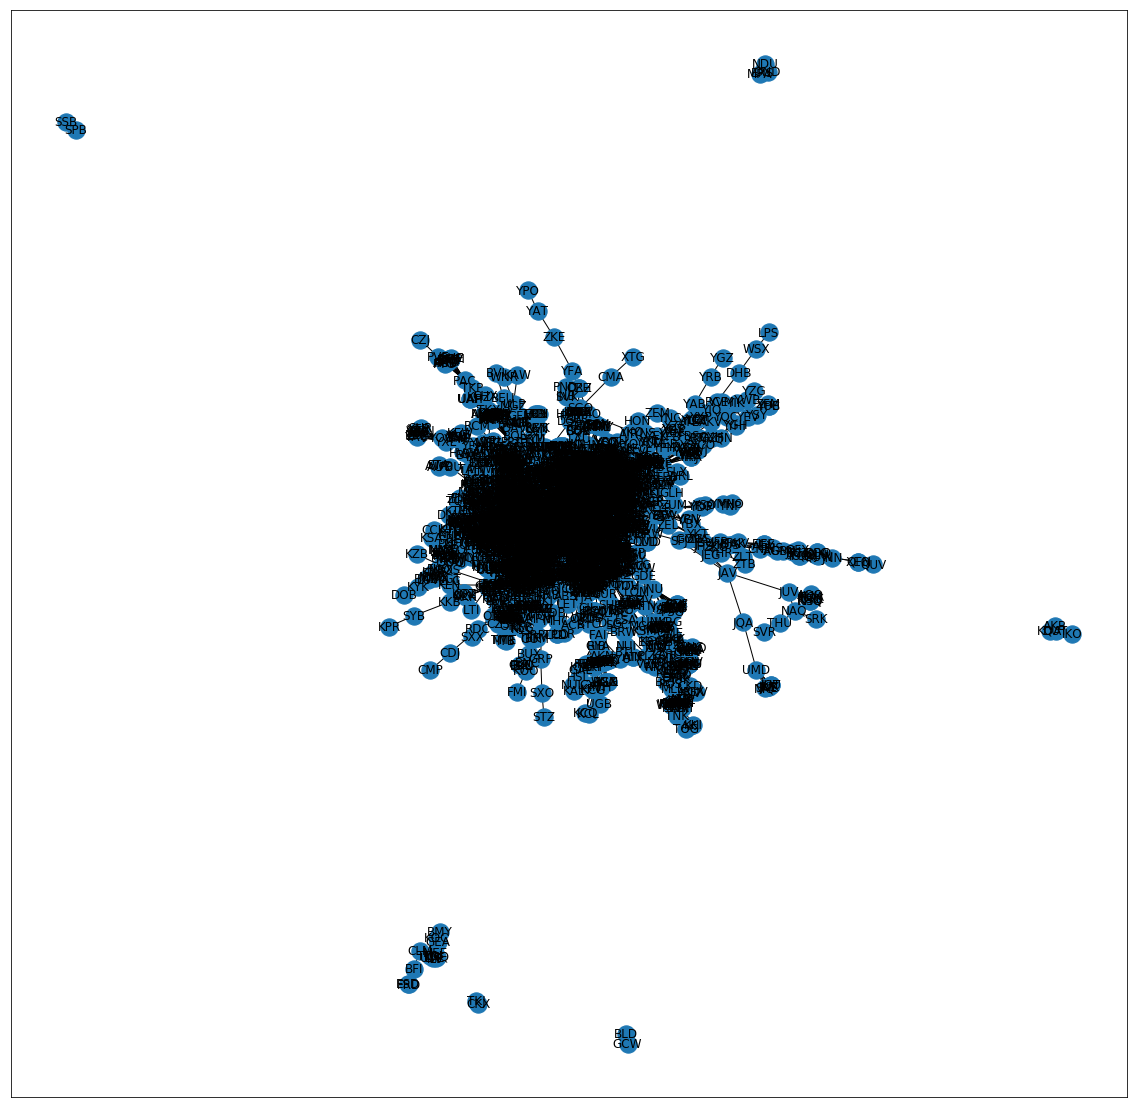

In [12]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
nx.draw_networkx(df, with_labels=True)

In [15]:
shortest_path_distance = nx.dijkstra_path(df, source='CMA', target='KPR', weight='Distance')
shortest_path_distance

['CMA', 'SGO', 'TWB', 'SYD', 'LAX', 'ANC', 'ADQ', 'KKB', 'SYB', 'KPR']

In [16]:
shortest_path_distance = nx.dijkstra_path(df, source='CMA', target='KRP', weight='AirTime')
shortest_path_distance

['CMA', 'SGO', 'TWB', 'SYD', 'PEK', 'CPH', 'KRP']